In [1]:
import pandas as pd
df = pd.read_csv("Scopus opción de grado.csv", sep=",")
df.columns
df

C:\Users\LENOVO\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


,Authors,Author full names,Author(s) ID,Title,Year,Source title,Volume,Issue,Art. No.,Page start,...,ISBN,CODEN,PubMed ID,Language of Original Document,Abbreviated Source Title,Document Type,Publication Stage,Open Access,Source,EID
0,"Cheng, H.; Hamidoğlu, A.; Sysoeva, L.; Venegas...","Cheng, Haihui (57474373400); Hamidoğlu, Ali (5...",57474373400; 57188877419; 59012461300; 5744320...,A novel evolutionary game-based low-methane ap...,2025,Applied Energy,401,NaN,126777,NaN,...,NaN,APEND,NaN,English,Appl. Energy,Article,Final,All Open Access; Hybrid Gold Open Access,Scopus,2-s2.0-105017229962
1,"Oliveira, V.E.S.F.; do Carmo, B.B.T.; da Costa...","Oliveira, V. E.S.F. (60117181000); do Carmo, B...",60117181000; 55279348100; 56941788400,Hydrogen supply chains: modeling challenges an...,2025,Applied Energy,401,NaN,126827,NaN,...,NaN,APEND,NaN,English,Appl. Energy,Article,Final,NaN,Scopus,2-s2.0-105017223146
2,"Schaëfer, K.; Kähkönen, A.-K.; Luzzini, D.","Schaëfer, Kati (57732173100); Kähkönen, Anni-K...",57732173100; 36239087000; 35225092400,Traceability in multi-tier supply chains: insi...,2025,Supply Chain Management,30,7,NaN,77,...,NaN,NaN,NaN,English,Supply Chain Manage.,Article,Final,All Open Access; Hybrid Gold Open Access,Scopus,2-s2.0-105016720876
3,"Petrillo, A.; Rehman, M.; De Felice, F.","Petrillo, Antonella (55193111000); Rehman, Miz...",55193111000; 58535452700; 25649083900,Optimizing coffee supply chain transparency an...,2025,European Journal of Innovation Management,28,11,NaN,267,...,NaN,NaN,NaN,English,Eur. J. Innov. Manage.,Article,Final,All Open Access; Hybrid Gold Open Access,Scopus,2-s2.0-105014873433
4,"Liang, Y.Y.; Shahabuddin, M.; Ahmed, S.F.; Tan...","Liang, Yong Yeow (55860318100); Shahabuddin, M...",55860318100; 55102175500; 56608467100; 5895802...,Optimizing sustainable aviation fuel supply ch...,2025,Fuel,402,NaN,135972,NaN,...,NaN,FUELA,NaN,English,Fuel,Review,Final,NaN,Scopus,2-s2.0-105007991307
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7322,"Wilhelm, M.M.; Blome, C.; Bhakoo, V.; Paulraj, A.","Wilhelm, Miriam M. (36769498400); Blome, Const...",36769498400; 35793637100; 37115136300; 7004920063,Sustainability in multi-tier supply chains: Un...,2016,Journal of Operations Management,41,NaN,NaN,42,...,NaN,JOTME,NaN,English,J Oper Manage,Article,Final,All Open Access; Bronze Open Access; Green Acc...,Scopus,2-s2.0-84950243306
7323,"Giannakis, M.; Papadopoulos, T.","Giannakis, Mihalis (22634489100); Papadopoulos...",22634489100; 16240044400,Supply chain sustainability: A risk management...,2016,International Journal of Production Economics,171,NaN,NaN,455,...,NaN,IJPCE,NaN,English,Int J Prod Econ,Conference paper,Final,NaN,Scopus,2-s2.0-84949603523
7324,"Zekić, Z.; Rupčić, N.; Jakopič, M.","Zekić, Zdravko (56062855600); Rupčić, Nataša (...",56062855600; 16243137000; 56986571600,Learning platform for supply chain system opti...,2016,International Journal of Logistics Systems and...,23,1,NaN,53,...,NaN,NaN,NaN,English,Int. J. Logist. Syst. Manage.,Article,Final,NaN,Scopus,2-s2.0-84948823404
7325,"Gopal, P.R.C.; Thakkar, J.","Gopal, P. R.C. (57197599655); Thakkar, Jitesh ...",57197599655; 12752722100,Sustainable supply chain practices: An empiric...,2016,Production Planning and Control,27,1,NaN,49,...,NaN,PPCOE,NaN,English,Prod Plann Control,Article,Final,NaN,Scopus,2-s2.0-84947047004


In [4]:
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# df = pd.read_csv("Database_sustainability.csv", sep=";")
df = pd.read_csv("Scopus opción de grado.csv", sep=",")

df_2=[]
# Mostrar las primeras filas del DataFrame
for i in range(0, len(df)-1):
    if df['Abstract'][i] != df['Abstract'][i+1]:
        df_2.append(df.loc[i])
df_2=pd.DataFrame(df_2)

df_2=df_2.dropna(subset=["Author Keywords"])


temas = ['supply chain', "supply chain management", "sustainability"]

df_2["Title"] = df_2["Title"].astype(str).str.lower()
df_filtrado = df_2[df_2["Title"].str.contains("|".join(temas), na=False) ]
df_3=[]
# Mostrar las primeras filas del DataFrame
for i in range(0, len(df)-1):
    if df['Abstract'][i] != df['Abstract'][i+1]:
        df_3.append(df.loc[i])
df_3=pd.DataFrame(df_3)
df_3=df_3.dropna(subset=["Index Keywords"])


temas = ['supply chain', "supply chain management", "sustainability"]
df_3["Title"] = df_3["Title"].astype(str).str.lower()
df_filtrado_2 = df_3[df_3["Title"].str.contains("|".join(temas), na=False) ]
print("Artículos de scopus de acuerdo a 'Author Keywords':           ",len(df_2))
print("Artículos filtrados en python de acuerdo a 'Author Keywords': ",len(df_filtrado))
print("Artículos de scopus de acuerdo a 'Author Keywords':           ",len(df_3))
print("Artículos filtrados en python de acuerdo a 'Index Keywords':  ",len(df_filtrado_2))


Artículos de scopus de acuerdo a 'Author Keywords':            6741
Artículos filtrados en python de acuerdo a 'Author Keywords':  4911
Artículos de scopus de acuerdo a 'Author Keywords':            4789
Artículos filtrados en python de acuerdo a 'Index Keywords':   3386


In [5]:
df_filtrado.to_csv("data_filtrada.csv",sep=";")

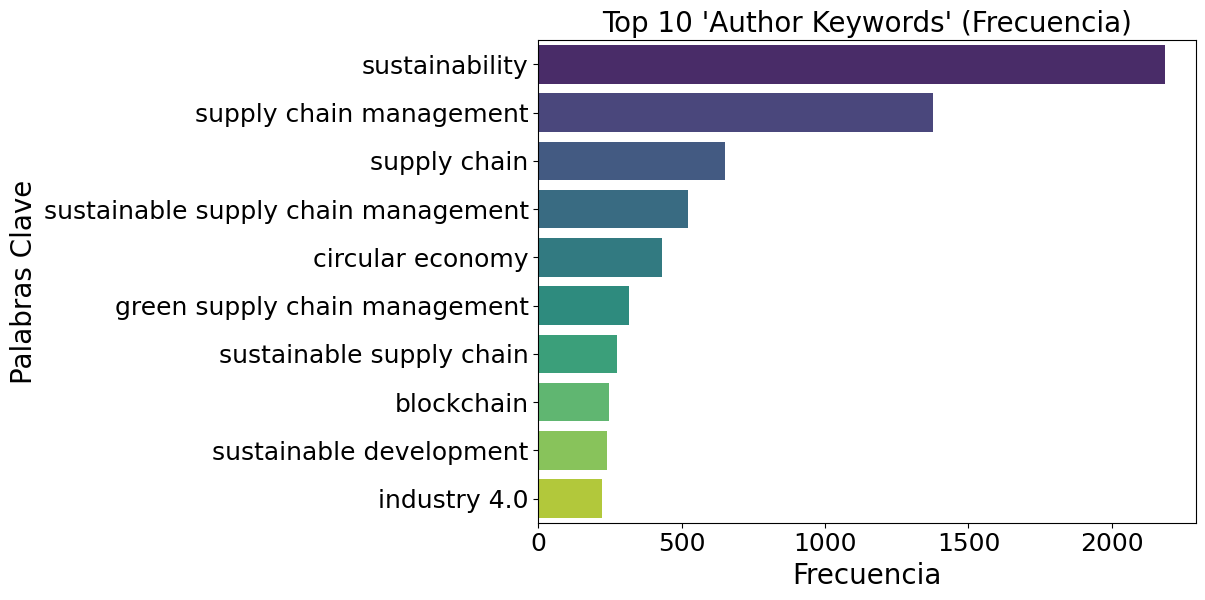

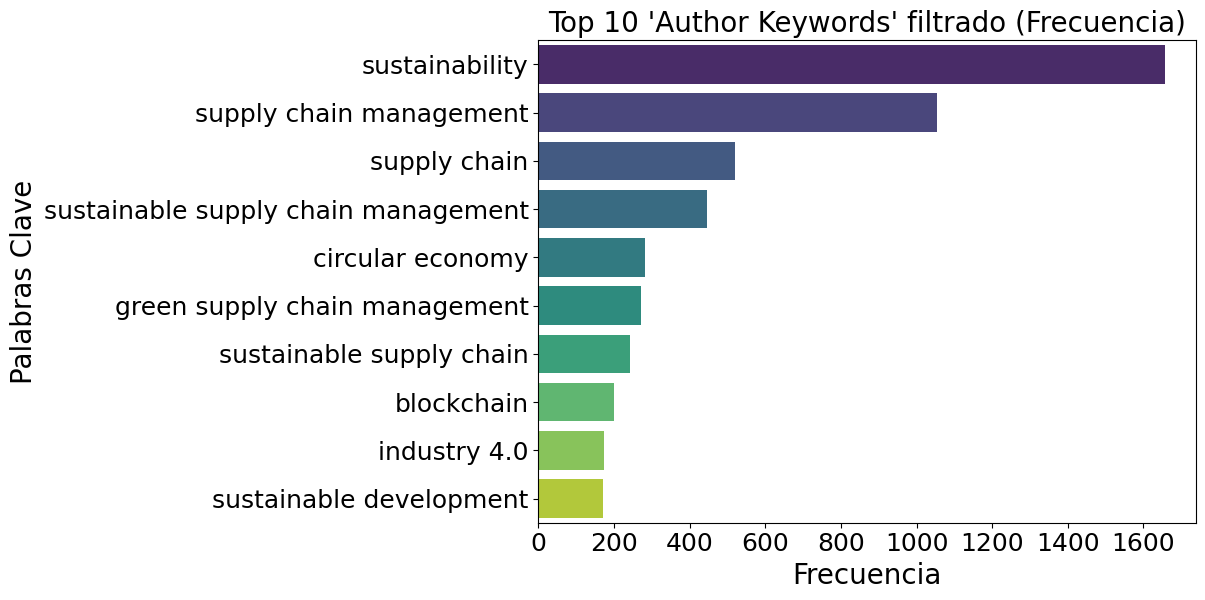

In [6]:

def extract_keywords(keywords_str):
    if isinstance(keywords_str, str):
        return [keyword.strip().lower() for keyword in keywords_str.split(';')]
    elif isinstance(keywords_str, list):
        return [keyword.strip().lower() for keyword in keywords_str]
    return []

all_keywords_lists = df_2['Author Keywords'].apply(extract_keywords).tolist()
all_keywords = [keyword for sublist in all_keywords_lists for keyword in sublist]
keyword_counts = Counter(all_keywords)
top_10_keywords = keyword_counts.most_common(10)
top_10_df = pd.DataFrame(top_10_keywords, columns=['Keyword', 'Frequency'])
plt.figure(figsize=(10, 6))
sns.barplot(x='Frequency', y='Keyword', data=top_10_df, palette='viridis')
plt.title("Top 10 'Author Keywords' (Frecuencia)", fontsize=20)
plt.xlabel('Frecuencia', fontsize=20)
plt.ylabel('Palabras Clave', fontsize=20)
plt.tight_layout()
plt.xticks(fontsize=18)  # Tamaño de las etiquetas del eje X
plt.yticks(fontsize=18)
plt.show()

all_keywords_lists = df_filtrado['Author Keywords'].apply(extract_keywords).tolist()
all_keywords = [keyword for sublist in all_keywords_lists for keyword in sublist]
keyword_counts = Counter(all_keywords)
top_10_keywords = keyword_counts.most_common(10)
top_10_df = pd.DataFrame(top_10_keywords, columns=['Keyword', 'Frequency'])
plt.figure(figsize=(10, 6))
sns.barplot(x='Frequency', y='Keyword', data=top_10_df, palette='viridis')
plt.title("Top 10 'Author Keywords' filtrado (Frecuencia)", fontsize=20)
plt.xlabel('Frecuencia', fontsize=20)
plt.ylabel('Palabras Clave', fontsize=20)
plt.tight_layout()
plt.xticks(fontsize=18)  # Tamaño de las etiquetas del eje X
plt.yticks(fontsize=18)
plt.show()

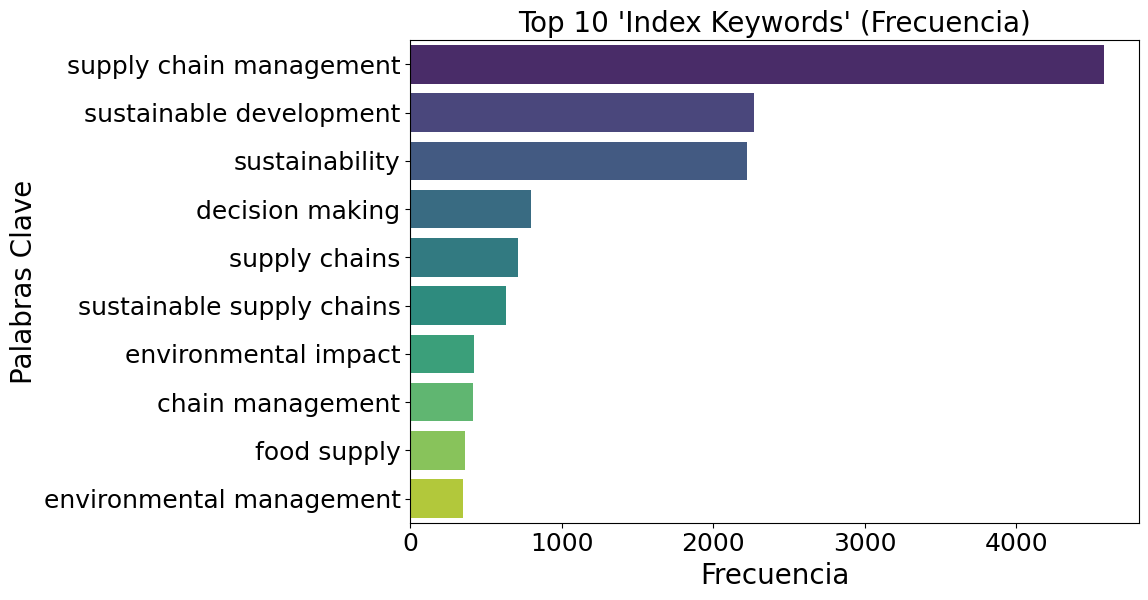

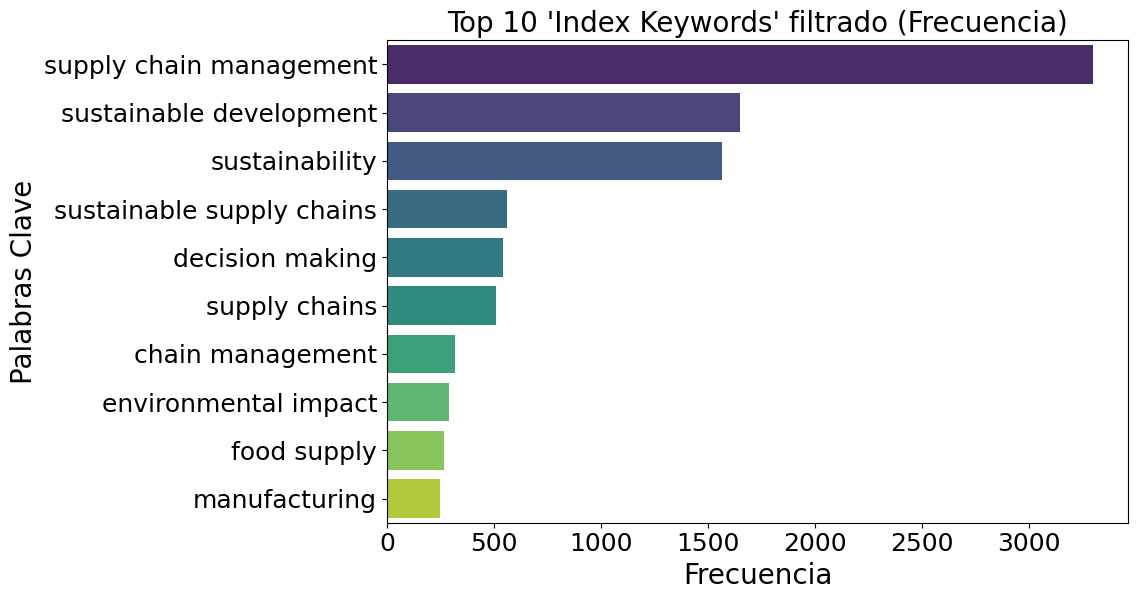

In [7]:
all_keywords_lists = df_3['Index Keywords'].apply(extract_keywords).tolist()
all_keywords = [keyword for sublist in all_keywords_lists for keyword in sublist]
keyword_counts = Counter(all_keywords)
top_10_keywords = keyword_counts.most_common(10)
top_10_df = pd.DataFrame(top_10_keywords, columns=['Keyword', 'Frequency'])
plt.figure(figsize=(10, 6))
sns.barplot(x='Frequency', y='Keyword', data=top_10_df, palette='viridis')
plt.title("Top 10 'Index Keywords' (Frecuencia)", fontsize=20)
plt.xlabel('Frecuencia', fontsize=20)
plt.ylabel('Palabras Clave', fontsize=20)
plt.tight_layout()
plt.xticks(fontsize=18)  # Tamaño de las etiquetas del eje X
plt.yticks(fontsize=18)
plt.show()

all_keywords_lists = df_filtrado_2['Index Keywords'].apply(extract_keywords).tolist()
all_keywords = [keyword for sublist in all_keywords_lists for keyword in sublist]
keyword_counts = Counter(all_keywords)
top_10_keywords = keyword_counts.most_common(10)
top_10_df = pd.DataFrame(top_10_keywords, columns=['Keyword', 'Frequency'])
plt.figure(figsize=(10, 6))
sns.barplot(x='Frequency', y='Keyword', data=top_10_df, palette='viridis')
plt.title("Top 10 'Index Keywords' filtrado (Frecuencia)", fontsize=20)
plt.xlabel('Frecuencia', fontsize=20)
plt.ylabel('Palabras Clave', fontsize=20)
plt.tight_layout()
plt.xticks(fontsize=18)  # Tamaño de las etiquetas del eje X
plt.yticks(fontsize=18)
plt.show()

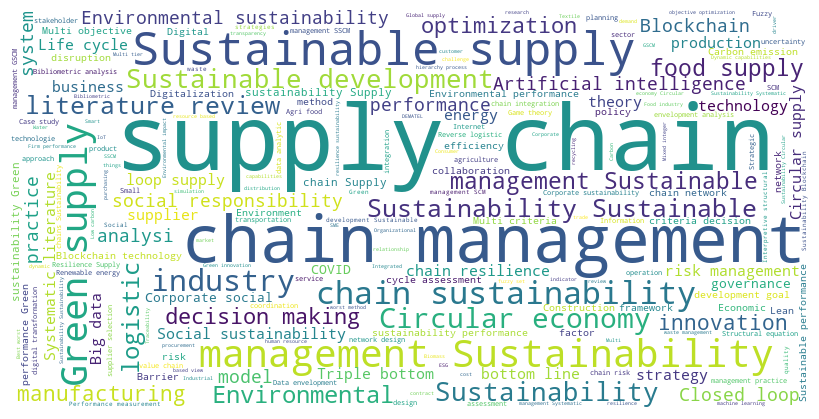

In [8]:
all_keywords = ' '.join(df_filtrado["Author Keywords"].astype(str))
stopwords = set(STOPWORDS)


wordcloud = WordCloud(width=800, height=400,
                      background_color='white',
                      stopwords=stopwords,
                      min_font_size=5).generate(all_keywords)

plt.figure(figsize=(10,4), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

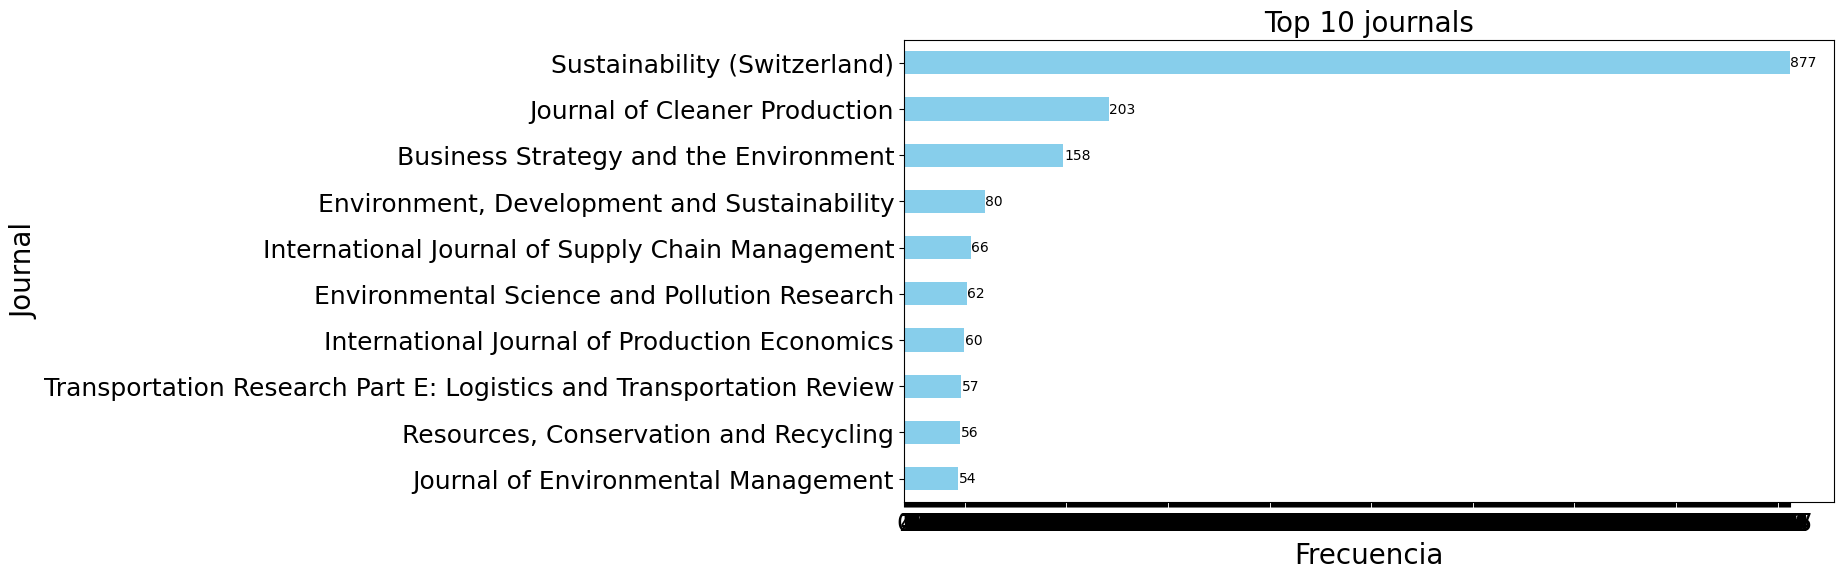

In [9]:
# Contar la frecuencia de autores y ordenar en orden descendente
autores_frecuencia = df_filtrado['Source title'].value_counts().head(10).sort_values(ascending=True)


plt.figure(figsize=(12, 6))
barras = autores_frecuencia.plot(kind='barh', color='skyblue')
plt.ylabel('Journal', fontsize=20)
plt.xlabel('Frecuencia', fontsize=20)
plt.title('Top 10 journals', fontsize=20)
# plt.grid(axis='x')

# Agregar etiquetas de datos
for bar in barras.patches:
    plt.text(bar.get_width() + 0.5, bar.get_y() + bar.get_height()/2, str(int(bar.get_width())), 
             va='center', fontsize=10)

plt.xticks(range(0, int(autores_frecuencia.max()) + 1, 1))  # Asegurar que el eje x tenga números enteros


# Modificar el tamaño de la letra en los ejes
plt.xticks(fontsize=18)  # Tamaño de las etiquetas del eje X
plt.yticks(fontsize=18)
plt.show()



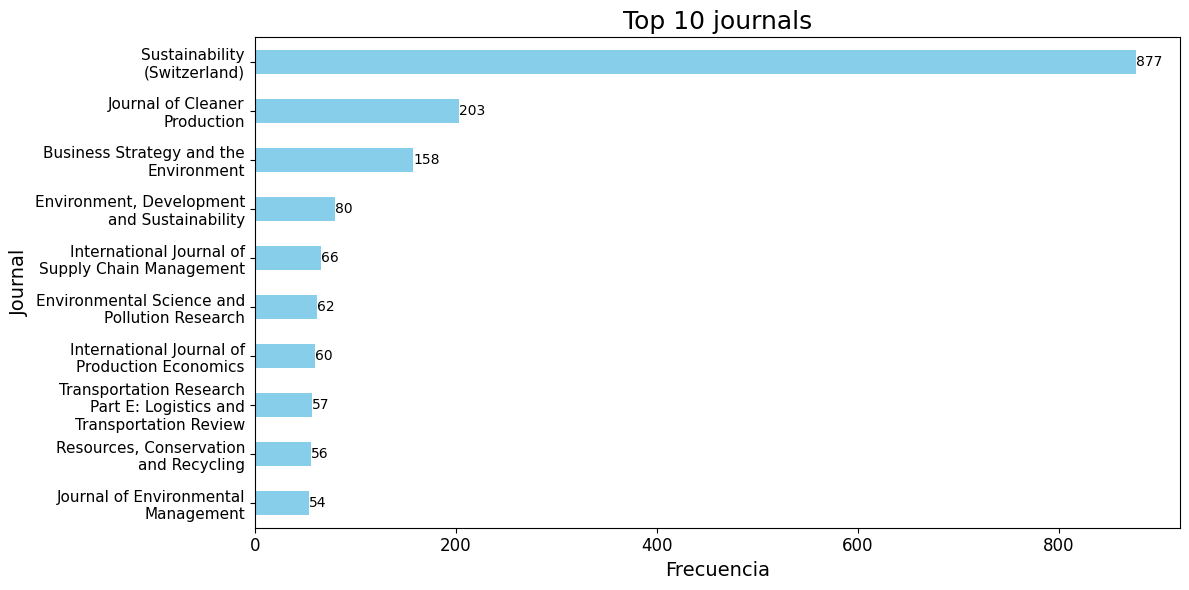

In [10]:
import matplotlib.pyplot as plt
import pandas as pd
import textwrap

# Agrupar y filtrar los 10 más frecuentes
top_journals = df_filtrado['Source title'].value_counts().nlargest(10).sort_values(ascending=True)

# Envolver nombres largos (máximo 25 caracteres por línea)
def wrap_text(text, width=25):
    return '\n'.join(textwrap.wrap(text, width=width))

top_journals.index = [wrap_text(journal) for journal in top_journals.index]

# Graficar
plt.figure(figsize=(12, 6))
bars = top_journals.plot(kind='barh', color='skyblue')

plt.xlabel('Frecuencia', fontsize=14)
plt.ylabel('Journal', fontsize=14)
plt.title('Top 10 journals', fontsize=18)

# Añadir etiquetas a las barras
for bar in bars.patches:
    plt.text(bar.get_width() + 0.3, bar.get_y() + bar.get_height()/2,
             str(int(bar.get_width())), va='center', fontsize=10)

plt.xticks(fontsize=12)
plt.yticks(fontsize=11)
plt.tight_layout()
plt.show()


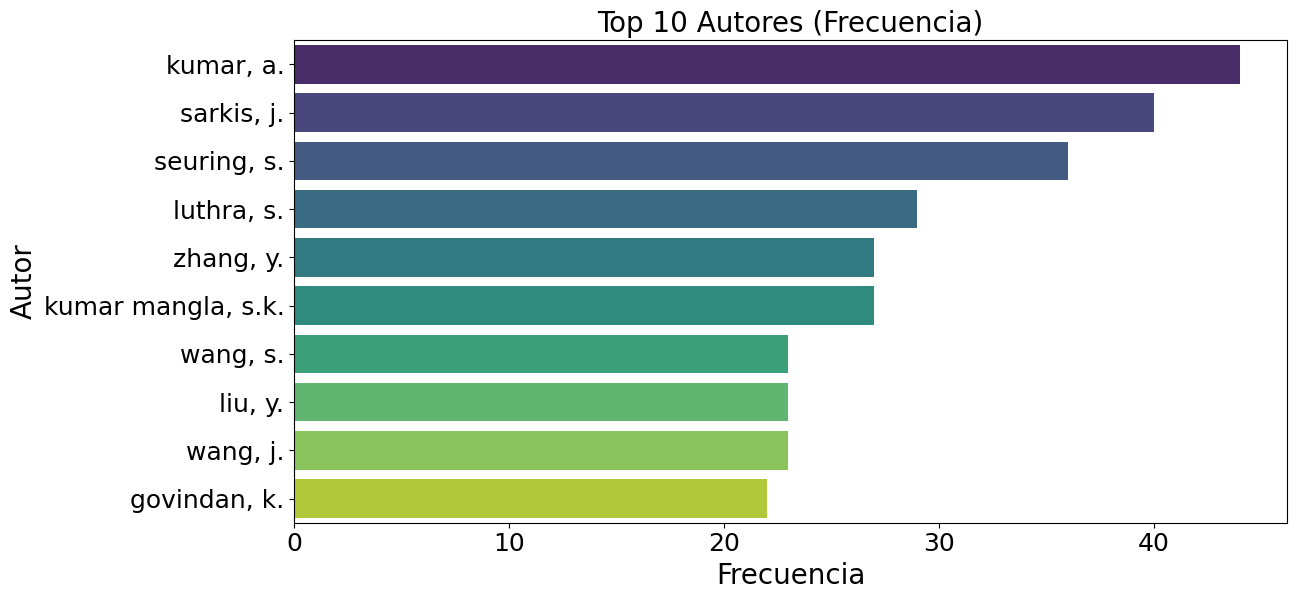

In [11]:
# Suponiendo que tu DataFrame se llama df_2 y la columna con keywords es "Author Keywords"

# 1. Función para extraer keywords individuales de cada fila
def extract_keywords(keywords_str):
    if isinstance(keywords_str, str):
        return [keyword.strip().lower() for keyword in keywords_str.split(';')]
    elif isinstance(keywords_str, list):
        return [keyword.strip().lower() for keyword in keywords_str]
    return []

# 2. Aplicar la función para obtener una lista de listas de keywords
all_keywords_lists = df_filtrado['Authors'].apply(extract_keywords).tolist()

# 3. Crear una lista plana con todas las keywords
all_keywords = [keyword for sublist in all_keywords_lists for keyword in sublist]

# 4. Contar la frecuencia de cada keyword
keyword_counts = Counter(all_keywords)

# 5. Obtener las 10 keywords más frecuentes
top_10_keywords = keyword_counts.most_common(10)

# 6. Crear un DataFrame para el bar plot
top_10_df = pd.DataFrame(top_10_keywords, columns=['Keyword', 'Frequency'])

# 7. Crear el bar plot horizontal con seaborn
plt.figure(figsize=(12, 6))
sns.barplot(x='Frequency', y='Keyword', data=top_10_df, palette='viridis')
plt.title('Top 10 Autores (Frecuencia)', fontsize=20)
plt.xlabel('Frecuencia', fontsize=20)
plt.ylabel('Autor', fontsize=20)
plt.tight_layout()
plt.xticks(fontsize=18)  # Tamaño de las etiquetas del eje X
plt.yticks(fontsize=18)
plt.show()

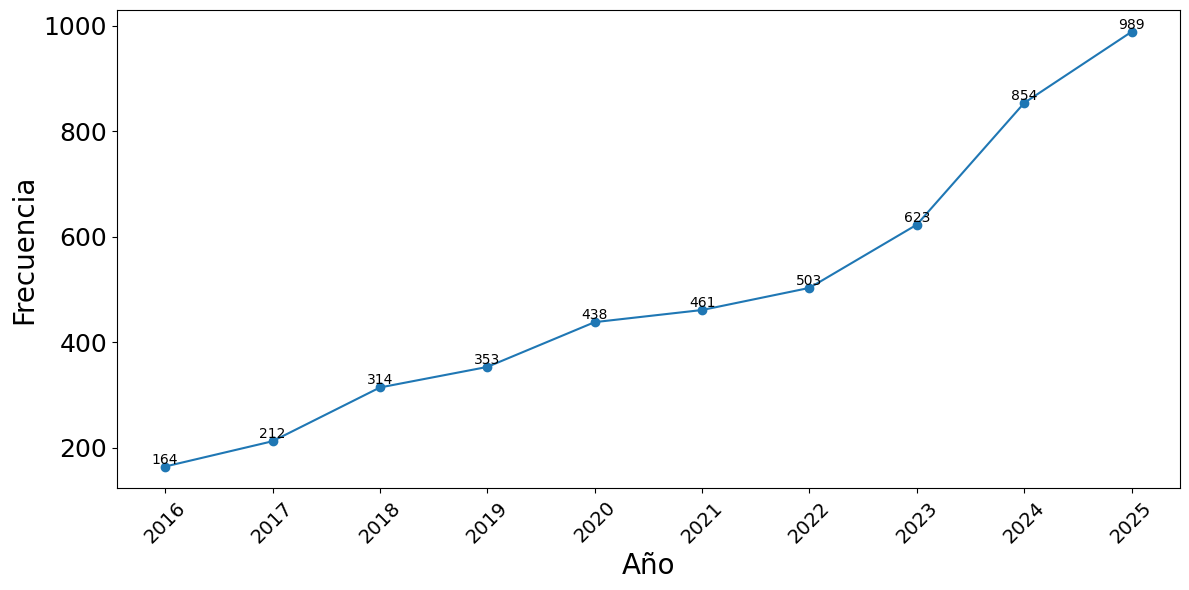

In [12]:
import matplotlib.pyplot as plt

# Contar la frecuencia de años
años_frecuencia = df_filtrado['Year'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
plt.plot(años_frecuencia.index, años_frecuencia.values, marker='o', linestyle='-')

# Agregar etiquetas de datos
for x, y in zip(años_frecuencia.index, años_frecuencia.values):
    plt.text(x, y, str(y), ha='center', va='bottom', fontsize=10)

plt.xlabel('Año', fontsize=20)
plt.ylabel('Frecuencia', fontsize=20)

# ✅ Mostrar solo años enteros y rotarlos un poco
plt.xticks(
    ticks=range(años_frecuencia.index.min(), años_frecuencia.index.max() + 1),
    fontsize=14,
    rotation=45
)

plt.yticks(fontsize=18)

# ❌ No mostrar la grilla
# plt.grid(False)  # o simplemente no la llamamos

plt.tight_layout()  # Para que no se recorten etiquetas
plt.show()


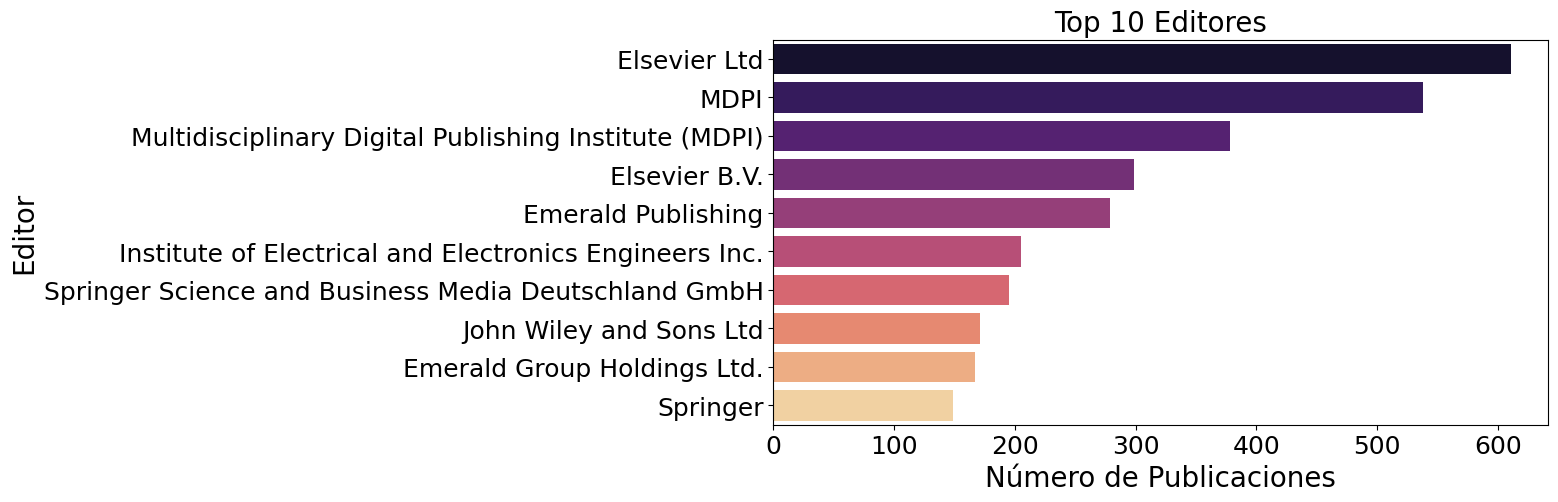

In [13]:
# Contar publicaciones por autor
top_autores = df_filtrado["Publisher"].value_counts().head(10)

# Graficar
plt.figure(figsize=(10,5))
sns.barplot(y=top_autores.index, x=top_autores.values, palette="magma")
plt.xlabel("Número de Publicaciones", fontsize=20)
plt.ylabel("Editor", fontsize=20)
plt.title("Top 10 Editores", fontsize=20)

plt.xticks(fontsize=18)  # Tamaño de las etiquetas del eje X
plt.yticks(fontsize=18)
plt.show()

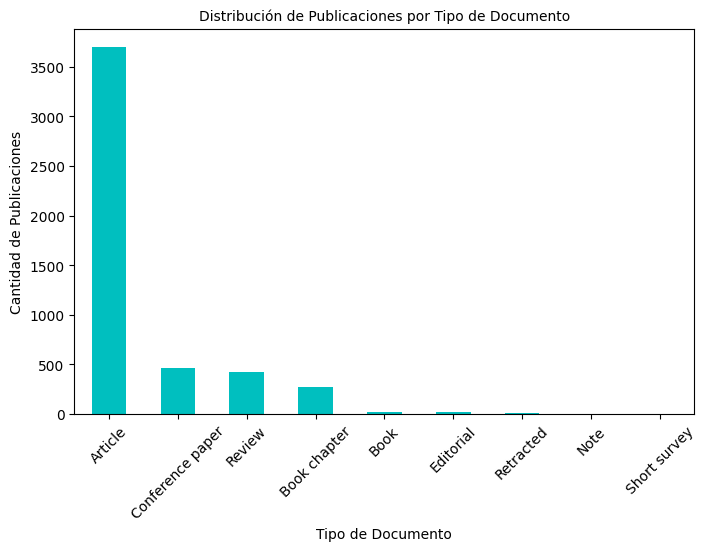

In [14]:
# Contar publicaciones por tipo de documento
doc_types = df_filtrado["Document Type"].value_counts()

# Graficar
plt.figure(figsize=(8,5))
doc_types.plot(kind="bar", color="c")
plt.xlabel("Tipo de Documento", fontsize=10)
plt.ylabel("Cantidad de Publicaciones", fontsize=10)
plt.title("Distribución de Publicaciones por Tipo de Documento", fontsize=10)
plt.xticks(rotation=45)
plt.xticks(fontsize=10)  # Tamaño de las etiquetas del eje X
plt.yticks(fontsize=10)
plt.show()


In [45]:
df_filtrado=df_filtrado.reset_index(drop=True)
df_filtrado['Abstract'][0]

'Agile methods have become increasingly popular in agile manufacturing due to their flexibility and adaptability. The Product Owner has a significant role within this framework. This paper describes the relevance of the activities of a Scrum Product Owner. The study identifies critical tasks that contribute to project success, as well as those leading to failure. The research examines the time allocation of successful and unsuccessful Product Owners across eight distinct activities, from task prioritization to customer relationship management. Additionally, the study assesses product and project health based on scope, budget, timeline and customer satisfaction. The findings highlight the complexity of the Product Owner role and reveal that customer-focused activities enhance project success, whereas excessive internal task focus can lead to project failure. Furthermore, statistical analysis, including Spearman’s rank correlation, provide insights into the relationships between these ac

In [46]:
df_filtrado.columns

Index(['Authors', 'Author full names', 'Author(s) ID', 'Title', 'Year',
       'Source title', 'Volume', 'Issue', 'Art. No.', 'Page start', 'Page end',
       'Page count', 'Cited by', 'DOI', 'Link', 'Affiliations',
       'Authors with affiliations', 'Abstract', 'Author Keywords',
       'Index Keywords', 'Molecular Sequence Numbers', 'Chemicals/CAS',
       'Tradenames', 'Manufacturers', 'Funding Details', 'Funding Texts',
       'References', 'Correspondence Address', 'Editors', 'Publisher',
       'Sponsors', 'Conference name', 'Conference date', 'Conference location',
       'Conference code', 'ISSN', 'ISBN', 'CODEN', 'PubMed ID',
       'Language of Original Document', 'Abbreviated Source Title',
       'Document Type', 'Publication Stage', 'Open Access', 'Source', 'EID'],
      dtype='object')